In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#한글 포트 설정
import os
if os.name=='posix':
    plt.rc("font", family = 'AppleGothic')
else:
    plt.rc("font", family = "Malgun Gothic")

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(train.head())
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [3]:
train.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

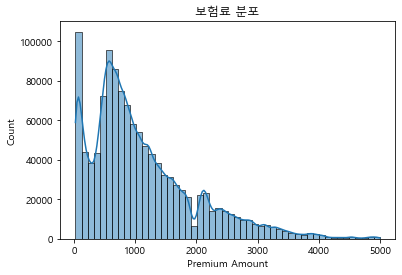

In [13]:
sns.histplot(train['Premium Amount'], bins=50, kde=True)
plt.title("보험료 분포")
plt.show()

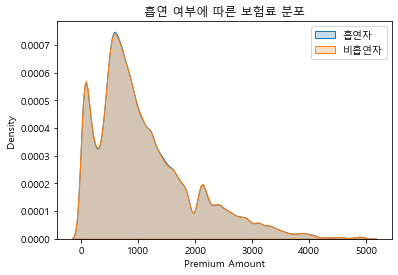

In [10]:
sns.kdeplot(data=train[train['Smoking Status'] == 'Yes'], x='Premium Amount', label='흡연자', fill=True)
sns.kdeplot(data=train[train['Smoking Status'] == 'No'], x='Premium Amount', label='비흡연자', fill=True)
plt.title("흡연 여부에 따른 보험료 분포")
plt.legend()
plt.show()

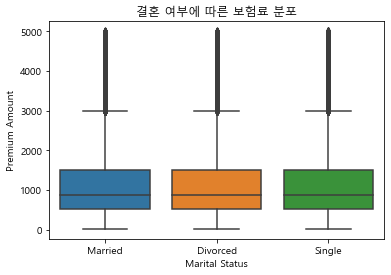

In [11]:
sns.boxplot(x='Marital Status', y='Premium Amount', data=train)
plt.title("결혼 여부에 따른 보험료 분포")
plt.show()

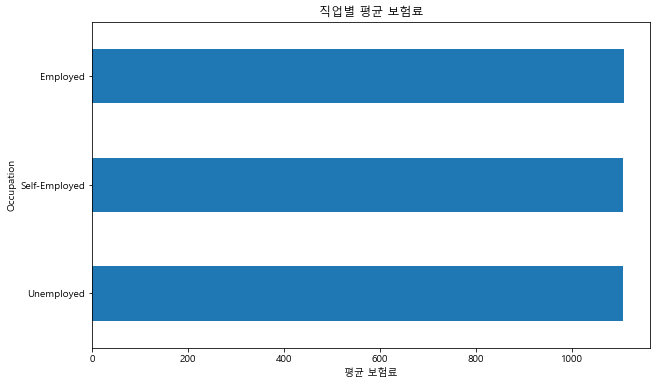

In [12]:
train.groupby('Occupation')['Premium Amount'].mean().sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("직업별 평균 보험료")
plt.xlabel("평균 보험료")
plt.show()

In [14]:
train = train.drop(columns= 'id')
test_id = test.pop('id')
y_train = train.pop('Premium Amount')

In [15]:
train['Policy Start Date'] = pd.to_datetime(train['Policy Start Date'])

# 연도, 월, 일, 시간, 분, 초 등을 새로운 열로 분리
train['Year'] = train['Policy Start Date'].dt.year
train['Month'] = train['Policy Start Date'].dt.month
train['Day'] = train['Policy Start Date'].dt.day
train['Hour'] = train['Policy Start Date'].dt.hour
train['Minute'] = train['Policy Start Date'].dt.minute
train['Second'] = train['Policy Start Date'].dt.second

In [16]:
test['Policy Start Date'] = pd.to_datetime(test['Policy Start Date'])

# 연도, 월, 일, 시간, 분, 초 등을 새로운 열로 분리
test['Year'] = test['Policy Start Date'].dt.year
test['Month'] = test['Policy Start Date'].dt.month
test['Day'] = test['Policy Start Date'].dt.day
test['Hour'] = test['Policy Start Date'].dt.hour
test['Minute'] = test['Policy Start Date'].dt.minute
test['Second'] = test['Policy Start Date'].dt.second

In [17]:
train = train.drop(columns= 'Policy Start Date')
test = test.drop(columns= 'Policy Start Date')

In [18]:
#결측치 처리
for column in train.select_dtypes(include=['object', 'category']).columns:
    mode = train[column].mode()[0]  # 최빈값 계산
    train[column].fillna(mode, inplace=True)

# 숫자형 변수: 평균값으로 결측치 채우기
for column in train.select_dtypes(include=['number']).columns:
    mean = train[column].mean()  # 평균값 계산
    train[column].fillna(mean, inplace=True)
    
for column in test.select_dtypes(include=['object', 'category']).columns:
    mode = test[column].mode()[0]  # 최빈값 계산
    test[column].fillna(mode, inplace=True)

# 숫자형 변수: 평균값으로 결측치 채우기
for column in test.select_dtypes(include=['number']).columns:
    mean = test[column].mean()  # 평균값 계산
    test[column].fillna(mean, inplace=True)
    
#train.isnull.sum()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = train.select_dtypes(include = ['number']).columns
train[col] = scaler.fit_transform(train[col])
test[col] = scaler.transform(test[col])

In [20]:
# train.head()

In [28]:
from sklearn.preprocessing import OrdinalEncoder
train[cols] = train[cols].fillna('Unknown')
test[cols] = test[cols].fillna('Unknown')

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=999)   
train[cols] = encoder.fit_transform(train[cols])
test[cols] = encoder.transform(test[cols])


In [29]:
train.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [30]:
test.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, y_train, test_size= 0.2, random_state = 2024)

In [32]:
from xgboost import XGBRegressor
xgb_mb= XGBRegressor() # Unpack the best_parameter dictionary
xgb_mb.fit(X_tr ,y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
pred = xgb_mb.predict(X_val)

In [35]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = mean_squared_error(y_val, pred, squared=False)
print("RMSE:", rmse)

RMSE: 843.7849315488307


In [43]:
pred = xgb_mb.predict(test)

In [21]:
sub = pd.DataFrame({'id': test_id,
                   'Premium Amount': pred})

In [22]:
sub.to_csv('result.csv', index=False)